Welcome everyone, this will be the Introduction to Keras workshop orgainised by EdIntelligence. My name is Naman Makkar and I will be taking you through a tour of one of the most popular deep learning libraries out there.
In this workshop we will be covering applications of keras in computer vision on the MNIST dataset to carry out handwritten digit recognition using Neural Networks.
This is the documentation for keras - [Keras](https://keras.io/)

We expect the viewers to have some basic information regarding the functioning of Neural Networks like Forward Propagation, Back propagation, activation functions, the 3 types of layers - Input,Hidden,Output etc.


In [1]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils.np_utils import to_categorical
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler

from sklearn.model_selection import train_test_split

In [3]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


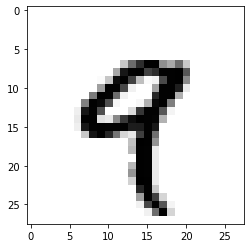

(60000, 28, 28)

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[4], cmap= plt.cm.binary)
plt.show()
x_train.shape

This is the documentation for ImageDataGenerator - [Keras-ImageDataGenerator](https://keras.io/api/preprocessing/image/)
It is used for the purpose of image augmentation which helps us train our model on a variety of augmented images and ensures that we train on a diverse dataset and do not end up over-generalising on a particular image given in our dataset.

In [5]:
datagen = ImageDataGenerator(rotation_range = 10, # Degree range for random rotations - Random images will be rotated by 10 degrees
                             zoom_range = 0.10, # Range for a random zoom - Images will be zoomed in the range [1-zoom_range,1+zoom_range] if the zoom_range is given as a float
                             width_shift_range = 0.1, # Shifts the image right or left by the fraction of the image width specified as float
                             height_shift_range = 0.1) # Shifts the image up or down by the fraction of the image height specified as float

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test = y_test.reshape(y_test.shape[0],1)

In [8]:
y_test.shape

(10000, 1)

In [9]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
x_train[4].shape

(28, 28)

In [10]:
x_test.shape

(10000, 28, 28)

Important to make x_train 4 dimensional since if we take batch size into account in batch gradient descent, 
the 4th dimension will represent the number of samples in the batch

In [17]:
x_train = x_train.reshape(-1,28,28,1) 

In [18]:
x_train.shape

(60000, 28, 28, 1)

In [19]:
x_test = x_test.reshape(-1,28,28,1)

In [20]:
x_test.shape

(10000, 28, 28, 1)

In [43]:
y_train = to_categorical(y_train)  
y_test = to_categorical(y_test)
#This is done to one-hot encode the training and testing labels

In [44]:
x_train2,x_val2,y_train2,y_val2 = train_test_split(x_train,y_train,test_size=0.1) 
# We split our training data into a training and a validation using train_test_split from scikit-learn

We will now build a fairly simple fully connected neural network
which is a network in which every neuron in one layer is connected to a neuron in the other layer.
This is a good resource to understand the differences between a fully connected NN and a Convolutional Neural Network - [Medium - Fully Connected vs CNN](https://medium.com/swlh/fully-connected-vs-convolutional-neural-networks-813ca7bc6ee5#:~:text=%20Fully%20connected%20neural%20network%20%201%20A,such%20networks%20do%20tend%20to%20have...%20More) 

In [58]:
model = Sequential() # This allows us to combine a sequence of layers - input layer, output layer and a series of hidden layers into a model
model.add(Flatten()) # This layer flattens the input being given to it
model.add(tf.keras.layers.Dense(256, activation='relu',input_shape=(784,))) # Used to make fully connected layers 
model.add(BatchNormalization()) # Used to normalize the inputs of each layer
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Why do we need Batch Normalization ? - [Why Batch Normalization](https://www.machinecurve.com/index.php/2020/01/14/what-is-batch-normalization-for-training-neural-networks/)

Batch Normalization is needed to avoid internal covariate shift.
Covariate shift basically means that if we train our model to map from x to y, if the distribution of x is changed our model will struggle to map from x to y even though the function that maps x to y remains the same.

For example lets say we have a binary classifier neural network that differentaites between cats and not-cats with cats being given the label 0 and not-cat being given the label 1, if we train our model on only black cats and have cats of different colour in our test set, our model will have trouble classifying coloured cats as cats even though the decision boundary between cat and not-cat remains unchanged.

When training a multi-layered deep-neural network due to backpropagation the following is expected to happen - 

*   The distribution of input data for some particular layer depends on all the interactions happening in all the upstream layers.
*   A change in how one or more of the upstream layer(s) process data will change the input distribution for this layer.

This is called a covariate shift since the hyperparameters of that particular layer keep changing with respect to the upstream layers which slows down training.

Batch Normalization normalizes the input of each layer (mean = 0 and standard deviation = 1) which helps in reducing the covariate shift since the hyperparameter of each hidden layer are no longer as sensitive to change via the upstream layers.



ReLU vs Sigmoid which activation function is best for hidden layers ?



*   The derivative of the sigmoid function is always smaller than 1, when we have multiple hidden layers, when we keep multiplying these gradients during forward and backward propagation we end up with a product very close to zero, this is the vanishing gradient problem, on the other hand the gradient of ReLU is 0 for x < 0 and 1 for x > 0 since ReLU = max(x,0), therefore, ReLU is the solution to the vanishing gradient problem.
*   ReLU is more computationally efficient than sigmoid since it only calculates max(x,0) and doesn't need expensive exponential calculations
*   In practice it gives better convergence results - [Krizhevsky et al](http://www.cs.toronto.edu/~fritz/absps/imagenet.pdf)







In [59]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
model.fit_generator(datagen.flow(x_train2, y_train2, batch_size=128),validation_data = (x_val2,y_val2), epochs=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
422/422 [==============================] - 19s 43ms/step - loss: 0.7756 - accuracy: 0.7548 - val_loss: 0.2259 - val_accuracy: 0.9335
Epoch 2/20
422/422 [==============================] - 18s 42ms/step - loss: 0.2561 - accuracy: 0.9199 - val_loss: 0.1506 - val_accuracy: 0.9545
Epoch 3/20
422/422 [==============================] - 18s 41ms/step - loss: 0.2031 - accuracy: 0.9344 - val_loss: 0.1070 - val_accuracy: 0.9682
Epoch 4/20
422/422 [==============================] - 18s 42ms/step - loss: 0.1751 - accuracy: 0.9448 - val_loss: 0.0951 - val_accuracy: 0.9707
Epoch 5/20
422/422 [==============================] - 18s 42ms/step - loss: 0.1653 - accuracy: 0.9479 - val_loss: 0.0873 - val_accuracy: 0.9723
Epoch 6/20
422/422 [==============================] - 18s 42ms/step - loss: 0.1420 - accuracy: 0.9551 - val_loss: 0.0897 - val_accuracy: 0.9728
Epoch 7/20
422/422 [==============================] - 18s 42ms/step - loss: 0.1310 - accuracy: 0.9575 - val_loss: 0.0889 - val_accuracy:

In [62]:
test_loss, test_acc = model.evaluate(x_test, y_test,verbose=1)
print(test_loss, test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0502 - accuracy: 0.9831
0.050212312489748 0.9830999970436096


We can save the model architecture and weights in a file like so - 

In [33]:
#save model
model.save('digit_reader.model')

INFO:tensorflow:Assets written to: digit_reader.model/assets


We can also just save the model weights instead of saving the entire model architecture like so
Note that if we just save the weights of our model, we can only use the weights file on a model with the exact same architecture as the model we just saved 


In [1]:
model.save_weights(filepath='final_weight.h5')

NameError: ignored

In [ ]:
model.load_weights('final_weight.h5')

In [34]:
loaded_model = keras.models.load_model('digit_reader.model')